In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
preds_538 = pd.read_csv("house_district_toplines_2022.csv")
preds_538.head()

<ipython-input-47-c94c80b7e6de>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  preds_538 = pd.read_csv("house_district_toplines_2022.csv")


,cycle,branch,district,forecastdate,expression,name_D1,name_D2,name_D3,name_D4,name_I1,...,wonrunoff_R2,lostrunoff_R2,wonrunoff_R3,lostrunoff_R3,wonrunoff_R4,lostrunoff_R4,wonrunoff_I1,lostrunoff_I1,simulations,timestamp
0,2022,House,WY-1,11/8/22,_lite,Lynnette GreyBull,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
1,2022,House,WV-2,11/8/22,_lite,Barry Lee Wendell,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
2,2022,House,WV-1,11/8/22,_lite,Lacy Watson,NaN,NaN,NaN,Belinda Fox-Spencer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
3,2022,House,WI-8,11/8/22,_lite,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
4,2022,House,WI-7,11/8/22,_lite,Richard Dick Ausman,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022


In [48]:
generic_ballot = pd.read_csv("generic_ballot_averages.csv")
generic_ballot.tail()

,candidate,pct_estimate,lo,hi,date,election,cycle
3471,Republicans,46.464413,41.188778,51.740048,2022-11-04,2022-11-08,2022
3472,Democrats,45.250101,40.916210,49.583993,2022-11-05,2022-11-08,2022
3473,Republicans,46.493154,41.228329,51.757979,2022-11-05,2022-11-08,2022
3474,Democrats,45.510514,41.185181,49.835847,2022-11-06,2022-11-08,2022
3475,Republicans,46.566844,41.342771,51.790918,2022-11-06,2022-11-08,2022


In [49]:
r_vs_est = preds_538[(preds_538["district"] == "CA-45") & (preds_538["expression"] == "_deluxe")][["forecastdate", "voteshare_mean_R1"]]
r_vs_est["forecastdate"] = pd.to_datetime(r_vs_est["forecastdate"])
r_vs_est

,forecastdate,voteshare_mean_R1
66929,2022-11-08,53.21406
67364,2022-11-07,53.21488
67799,2022-11-06,53.26234
68234,2022-11-05,53.46260
68669,2022-11-04,53.46034
...,...,...
131309,2022-06-06,52.16106
131744,2022-06-05,52.08631
132179,2022-06-03,52.08834
132614,2022-06-02,53.26776


In [50]:
generic_ballot["dem_pct"] = generic_ballot["pct_estimate"] * (generic_ballot["candidate"] == "Democrats")
generic_ballot["rep_pct"] = generic_ballot["pct_estimate"] * (generic_ballot["candidate"] == "Republicans")
generic_ballot["date"] = pd.to_datetime(generic_ballot["date"])
gen_bal_dat = generic_ballot.groupby("date").sum()[["dem_pct", "rep_pct"]].reset_index()
gen_bal_dat

<ipython-input-50-bd2f359e930c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gen_bal_dat = generic_ballot.groupby("date").sum()[["dem_pct", "rep_pct"]].reset_index()


,date,dem_pct,rep_pct
0,2017-04-15,43.944490,39.549690
1,2017-04-16,43.749650,39.592540
2,2017-04-17,43.745530,39.587940
3,2017-04-18,43.740520,39.582230
4,2017-04-19,43.410340,38.840260
...,...,...,...
1733,2022-11-02,45.195710,46.414210
1734,2022-11-03,45.155372,46.432090
1735,2022-11-04,45.240394,46.464413
1736,2022-11-05,45.250101,46.493154


In [51]:
all_dat = pd.merge(r_vs_est, gen_bal_dat, left_on="forecastdate", right_on="date")[["forecastdate", "voteshare_mean_R1", "dem_pct", "rep_pct"]]
all_dat["R_gen"] = all_dat["rep_pct"] / (all_dat["rep_pct"] + all_dat["dem_pct"]) * 100
all_dat

,forecastdate,voteshare_mean_R1,dem_pct,rep_pct,R_gen
0,2022-11-06,53.26234,45.510514,46.566844,50.573610
1,2022-11-05,53.46260,45.250101,46.493154,50.677463
2,2022-11-04,53.46034,45.240394,46.464413,50.667369
3,2022-11-03,53.51397,45.155372,46.432090,50.696994
4,2022-11-02,53.48219,45.195710,46.414210,50.665048
...,...,...,...,...,...
146,2022-06-06,52.16106,42.801442,45.016132,51.260961
147,2022-06-05,52.08631,42.810046,45.009001,51.251981
148,2022-06-03,52.08834,42.803884,45.011479,51.256953
149,2022-06-02,53.26776,42.808180,45.001246,51.248765


In [52]:
pred_nat_538 = pd.read_csv("house_national_toplines_2022.csv")
pred_nat_538.head()

,cycle,branch,expression,forecastdate,chamber_Dparty,chamber_Rparty,mean_seats_Dparty,mean_seats_Rparty,median_seats_Dparty,median_seats_Rparty,...,p90_popvote_margin,p10_popvote_margin,statesmajority_Dparty,statesmajority_Rparty,statesmajority_noparty,delegations_Dparty,delegations_Rparty,delegations_nomajority,simulations,timestamp
0,2022,House,_lite,11/8/22,0.25240,0.74760,206.2447,228.7553,206.0,229.0,...,2.128729,-6.927999,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
1,2022,House,_lite,11/7/22,0.25305,0.74695,206.1937,228.8063,206.0,229.0,...,2.154011,-7.016928,NaN,NaN,NaN,NaN,NaN,NaN,40000,23:04:54 7 Nov 2022
2,2022,House,_lite,11/6/22,0.25910,0.74090,206.4444,228.5556,207.0,228.0,...,2.192440,-7.035103,NaN,NaN,NaN,NaN,NaN,NaN,40000,20:35:27 6 Nov 2022
3,2022,House,_lite,11/5/22,0.24280,0.75720,205.5752,229.4248,206.0,229.0,...,2.094782,-7.169331,NaN,NaN,NaN,NaN,NaN,NaN,40000,20:36:24 5 Nov 2022
4,2022,House,_lite,11/4/22,0.24210,0.75790,205.5528,229.4471,206.0,229.0,...,2.055893,-7.188732,NaN,NaN,NaN,NaN,NaN,NaN,40000,21:58:23 4 Nov 2022


In [53]:
nat_dat = pred_nat_538[pred_nat_538["expression"] == "_deluxe"][["forecastdate", "popvote_margin"]]
nat_dat["forecastdate"] = pd.to_datetime(nat_dat["forecastdate"])
nat_dat["R_2p"] = 50 - nat_dat["popvote_margin"] / 2 
nat_dat

,forecastdate,popvote_margin,R_2p
153,2022-11-08,-3.981052,51.990526
154,2022-11-07,-3.982990,51.991495
155,2022-11-06,-4.093666,52.046833
156,2022-11-05,-4.279350,52.139675
157,2022-11-04,-4.317135,52.158568
...,...,...,...
301,2022-06-06,-6.444363,53.222181
302,2022-06-05,-6.338654,53.169327
303,2022-06-03,-6.251274,53.125637
304,2022-06-02,-6.403397,53.201698


In [54]:
all_dat = pd.merge(all_dat, nat_dat, on="forecastdate")
all_dat

,forecastdate,voteshare_mean_R1,dem_pct,rep_pct,R_gen,popvote_margin,R_2p
0,2022-11-06,53.26234,45.510514,46.566844,50.573610,-4.093666,52.046833
1,2022-11-05,53.46260,45.250101,46.493154,50.677463,-4.279350,52.139675
2,2022-11-04,53.46034,45.240394,46.464413,50.667369,-4.317135,52.158568
3,2022-11-03,53.51397,45.155372,46.432090,50.696994,-4.410835,52.205418
4,2022-11-02,53.48219,45.195710,46.414210,50.665048,-4.327820,52.163910
...,...,...,...,...,...,...,...
146,2022-06-06,52.16106,42.801442,45.016132,51.260961,-6.444363,53.222181
147,2022-06-05,52.08631,42.810046,45.009001,51.251981,-6.338654,53.169327
148,2022-06-03,52.08834,42.803884,45.011479,51.256953,-6.251274,53.125637
149,2022-06-02,53.26776,42.808180,45.001246,51.248765,-6.403397,53.201698


In [56]:
all_dat = all_dat.sort_values("forecastdate")

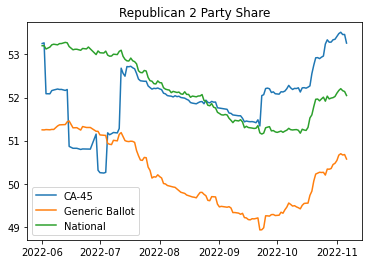

In [61]:
plt.plot("forecastdate", "voteshare_mean_R1", data=all_dat, label="CA-45")
plt.plot("forecastdate", "R_gen", data=all_dat, label="Generic Ballot")
plt.plot("forecastdate", "R_2p", data=all_dat, label="National")
plt.legend()
plt.title("Republican 2 Party Share")
plt.savefig("GOP share.png")